### OpenCV
- Open Source Computer Vision Library는 오픈소스 이미지(동영상) 라이브러리
- 이미지 형식 변환, 필터 처리, 얼굴 인식, 물체 인식, 문자 인식 등 이미지와 관련된 다양한 처리
- 머신러닝에서 OpenCV 사용 : 머신러닝의 입력으로 전달하려면 이미지를 숫자 배열 데이터로 변경
- pip install opencv-python

In [1]:
!pip install opencv-python

In [2]:
%pwd

'C:\\Caba2012\\workspace\\Caba_dl'

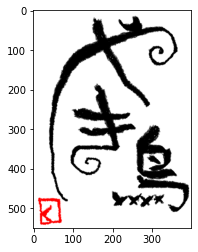

In [4]:
# 이미지 다운로드
import urllib.request as req
import matplotlib.pyplot as plt
import cv2

url = 'http://uta.pw/shodou/img/28/214.png'
req.urlretrieve(url, 'data/facedata/sample1')

img = cv2.imread('data/facedata/sample1')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


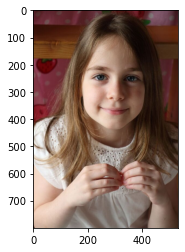

True

In [7]:
filepath = 'data/facedata/girl.png'
img = cv2.imread(filepath)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite('data/facedata/girl.png',img)

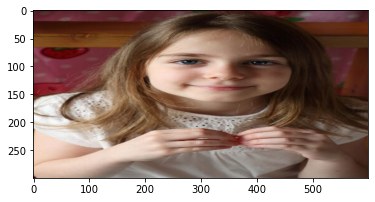

In [9]:
filepath = 'data/facedata/girl.png'
img = cv2.imread(filepath)
im2 = cv2.resize(img, (600,300))

cv2.imwrite('data/facedata/out-resize.png', im2)

plt.imshow(cv2.cvtColor(im2,cv2.COLOR_BGR2RGB))
plt.show()

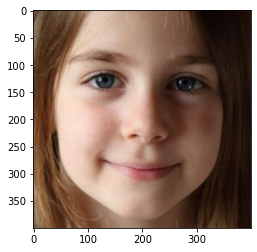

In [10]:
img = cv2.imread('data/facedata/out.png')
im2 = img[150:450, 150:450]

im2 = cv2.resize(im2, (400,400))
cv2.imwrite('data/facedata/cut-resize.png', im2)

plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))

[캐스케이드 분류기] https://dsbook.tistory.com/164

[색상 공간 변환] https://076923.github.io/posts/Python-opencv-10/

[캐스케이드 파일(얼굴 요소 DB)] https://github.com/opencv/opencv/tree/master/data/haarcascades

얼굴의 좌표 = 149 127 316 316


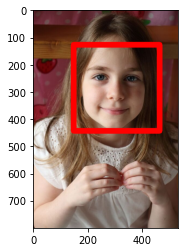

In [12]:
cascade_file = 'data/facedata/haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

filepath = 'data/facedata/girl.png'
img = cv2.imread(filepath)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))  # 얼굴 인식영역의 최소 크기

# 결과 확인
if len(face_list) == 0:
    print('얼굴 인식 실패')
    quit()
# 인식한 부분 표시
for (x,y,w,h) in face_list:
    print('얼굴의 좌표 =', x,y,w,h)
    red = (0,0,255)
    cv2.rectangle(img, (x, y),(x+w,y+h), red, thickness=20)

# 이미지 출력
cv2.imwrite('data/facedata/face-detect.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
%pwd

'C:\\Caba2012\\workspace\\Caba_dl'

In [ ]:
# 모자익 처리하는 사용자 함수 : mosaic.py
import cv2

def mosaic(img, rect, size):
    # 모자이크 처리할 부분 추출
    (x1,y1,x2,y2) = rect
    w = x2-x1
    h = y2-y1
    i_rect = img[y1:y2, x1:x2]
    # 축소하고 확대하기
    i_small = cv2.resize(i_rect,(size,size))
    i_mos = cv2.resize(i_small, (w,h), interpolation=cv2.INTER_AREA)  # 보간법
    # 모자이크 적용
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

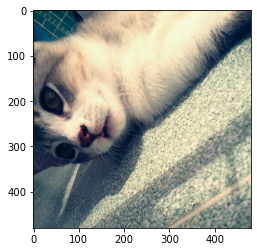

In [13]:
img = cv2.imread('data/facedata/cat.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

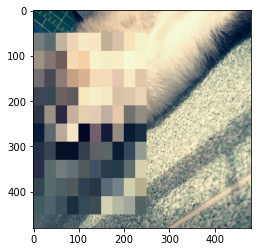

In [24]:
import cv2
from mosaic import mosaic as mosaic

img = cv2.imread('data/facedata/cat.png')
mos = mosaic(img, (0,50,250,450), 10)

cv2.imwrite('data/facedata/ca-mosaic.png', mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# [과제] 사람 얼굴에 자동으로 모자이크 처리하기
# "data/facedata/family.jpg"

In [ ]:
# [과제] 5명 이상 얼굴 사진이 들어있는 이미지를 다운로드 받아서 모자이크 처리를 하세요.